In [76]:
import numpy as np
import numba
from numba import typed
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [10]:
#np.zeros((10, 10))
x = np.random.randint(0, 2, (10, 10))
x

array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

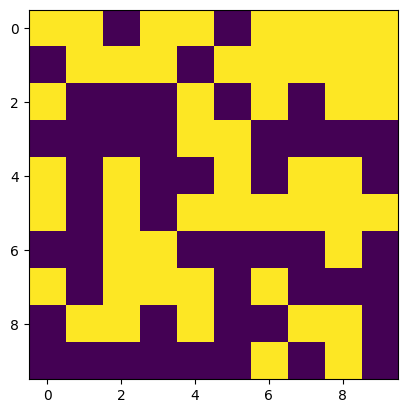

In [12]:
plt.imshow(x)

In [54]:
@numba.njit
def next_cell_state(state, i, j):
    height, width = state.shape

    sum_of_states = -state[i, j]
    for dw in range(-1, 2):
        for dh in range(-1, 2):
            sum_of_states += state[(i + dh) % height, (j + dw) % width]
    
    if state[i, j] == 0 and sum_of_states == 3:
        return 1

    if state[i, j] == 1 and (sum_of_states == 3 or sum_of_states == 2):
        return 1
    
    return 0

In [110]:
@numba.njit(numba.void(numba.int64[:, :], numba.int64[:, :]), parallel = True)
#@numba.njit(numba.void(numba.int64[:, :], numba.int64[:, :]))
def next_state(state_in, state_out):
    height, width = state_in.shape

    for i in numba.prange(height):
        for j in range(width):
            state_out[i, j] = next_cell_state(state_in, i, j)   


In [111]:
@numba.njit
def generate_states(nstates):
    state_in = np.random.randint(0, 2, (1000, 1000))
    states = typed.List()
    states.append(state_in)

    for _ in range(nstates):
        state_out = np.zeros_like(state_in)
        next_state(state_in, state_out)
        state_in = state_out
        states.append(state_in)

    return states


In [114]:
states = generate_states(1000)

In [80]:
type(states)

numba.typed.typedlist.List

In [53]:
fig, ax = plt.subplots(figsize = (5, 5))
fig.subplots_adjust(0, 0, 1, 1)
img = ax.imshow(states[0])

plt.close()

def frame(i):
    img.set_data(states[i])
    return img,

anim = FuncAnimation(fig, frame, frames = 200, interval = 200, blit = True)
HTML(anim.to_jshtml())
